三ツ国拓真　線形補間

In [2]:
include("Interpolation.jl")

my_lin_interp (generic function with 1 method)

In [3]:
;cat Interpolation.jl

function my_lin_interp(grid, vals)
    function func(x::Real)
        a=searchsortedfirst(grid, x)
        b=searchsortedlast(grid, x)
        if a==length(grid)+1||b==0
            return 0
        elseif a==1
            return vals[1]
        else
            return (vals[a]-vals[a-1])/(grid[a]-grid[a-1])*(x-grid[a-1])+vals[a-1]
        end
    end
    

    function func{T<:Real}(x::AbstractVector{T})
        n = length(x)
        out = Array(Float64, n)
        for i in 1:n
            out[i] = func(x[i])
        end
        return out
    end

    return func
end

In [4]:
grid = [1, 2]
vals = [2, 0]

2-element Array{Int64,1}:
 2
 0

In [5]:
g([1.25, 1.5,1.3,3])

LoadError: LoadError: UndefVarError: g not defined
while loading In[5], in expression starting on line 1

In [6]:
g = my_lin_interp(grid, vals)
grid = [0, 2, 4, 6, 8, 10]
vals = [1, 4, 5, 8, 9, 11]
g([1.25, 1.5,1.3,0])

4-element Array{Float64,1}:
 1.5
 1.0
 1.4
 0.0

In [7]:
g(11)

0

グラフ

In [29]:
include("Interpolation.jl")

my_lin_interp (generic function with 1 method)

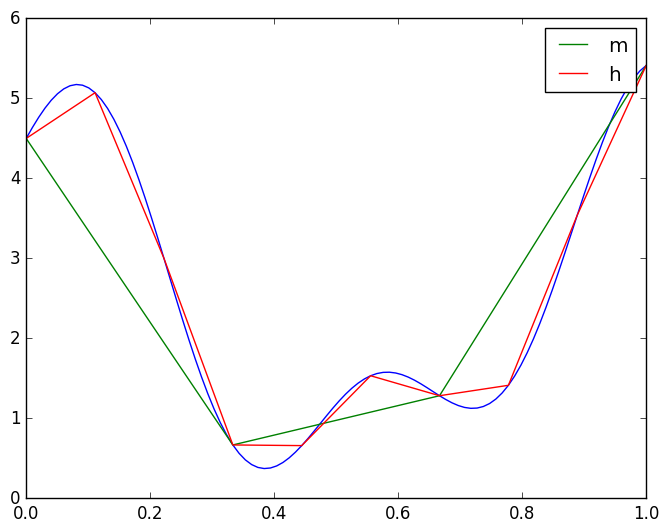

PyObject <matplotlib.legend.Legend object at 0x3276546d0>

In [39]:
using PyPlot
x = linspace(0, 1, 100)
f(x) = 2 .* cos(6x) .+ sin(14x) .+ 2.5

m_grid=linspace(0, 1, 4)
h_grid=linspace(0, 1, 10)
m_vals=f(m_grid)
h_vals=f(h_grid)
m = my_lin_interp(m_grid,m_vals)
h = my_lin_interp(h_grid,h_vals)


plot(x, f(x))
plot(x,m(x),label="m")
plot(x,h(x),label="h")
legend()